<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme des régions de confiance </h1>
</center>

# Régions de confiance avec Pas de Cauchy 

## Implémentation 

1. Coder l'algorithme du pas de Cauchy dans le fichier `src/cauchy.jl`). La spécification de cet algorithme est donnée dans le fichier.
2. Ecrire des tests exhaustifs (qui testent tous les cas de figure possibles) pour votre algorithme du pas de Cauchy. Vous remplirez pour cela le fichier `test/tester_cauchy.jl` sur le modèle des autres fichiers de tests et vous exécuterez dans la cellule de code ci-après ces tests.

In [1]:
include("../src/cauchy.jl")         # votre algorithme
include("../test/tester_cauchy.jl") # la fonction pour tester votre algorithme

#
tester_cauchy(cauchy); # tester l'algorithme

Test Summary: | Pass  Total  Time
Pas de Cauchy |    5      5  0.1s


3. Coder l'algorithme des régions de confiance (fichier `src/regions_de_confiance.jl`). Sa spécification est donnée dans le fichier.
4. Vérifier que les tests ci-dessous passent.

In [7]:
include("../src/regions_de_confiance.jl")
include("../test/tester_rc_cauchy.jl")

#
afficher = true # si true, alors affiche les résultats des algorithmes

#
tester_rc_cauchy(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : true



-------------------------------------------------------------------------
Résultats de : RC et cauchy appliqué à f1:
  * x0       = [1, 0, 0]
  * x_sol    = [1.0000065049853921, 1.000000873235793, 0.9999952414861938]
  * f(x_sol) = 7.71589405988668e-11
  * nb_iters = 33
  * flag     = 2
  * solution = [1, 1, 1]


-------------------------------------------------------------------------
Résultats de : RC et cauchy appliqué à f1:
  * x0       = [10.0, 3.0, -2.2]
  * x_sol    = [1.0000036431990917, 0.9999997146801121, 0.9999957861612836]
  * f(x_sol) = 3.2331854932222266e-11
  * nb_iters = 34
  * flag     = 2
  * solution = [1, 1, 1]


-------------------------------------------------------------------------
Résultats de : RC et cauchy appliqué à f2:
  * x0       = [-1.2, 1.0]
  * x_sol    = [0.9993529197783604, 0.9987042941075144]
  * f(x_sol) = 4.190986064810949e-7
  * nb_iters = 5000
  * flag     = 3
  * solution = [1, 1]
-------------------------------------------------------------------------


Résultats de : RC et cauchy appliqué à f2:
  * x0       = [10, 0]
  * x_sol    = [0.9961677295959247, 0.9923393628794702]
  * f(x_sol) = 1.4697922915267688e-5
  * nb_iters = 864
  * flag     = 0
  * solution = [1, 1]
-------------------------------------------------------------------------
Résultats de : RC et cauchy appliqué à f2:
  * x0       = [0.0, 0.0050000000010000005]
  * x_sol    = [0.9998396448654863, 0.9996777928374155]
  * f(x_sol) = 2.5945602471870198e-8
  * nb_iters = 4512
  * flag     = 2
  * solution = [1, 1]
Test Summary:        | Pass  Total  Time
RC et pas de Cauchy  |   15     15  1.0s


## Interprétation 

<!-- Pour ces questions, des représentations graphiques sont attendues pour corroborer vos réponses. -->

1. Soit la fonction $f_1 \colon \mathbb{R}^3 \to \mathbb{R}$ définie par
$$ 
    f_1(x_1,x_2, x_3) = 2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2
$$ 
Quelle relation lie la fonction $f_1$ et son modèle de Taylor à l’ordre 2 ? Comparer alors les performances de l'algorithme de Newton et celui des régions de confiance avec le pas de Cauchy sur cette fonction.

2. Le rayon initial de la région de confiance est un paramètre important dans l’analyse
de la performance de l’algorithme. Sur quel(s) autre(s) paramètre(s) peut-on jouer
pour essayer d’améliorer cette performance ? Étudier l’influence d’au moins deux de
ces paramètres. Pour cela vous ferez des tests numériques et donnerez les résultats sous forme de tableaux et de graphiques.

## Justifications

1.  La fonction $f_1$ définie ci-dessus est quadratique, elle se confond alors à son modèle de Taylor à l'ordre 2.

    D'après le fichier **newton.ipynb**, il suffit d'une unique itération à l'algorithme de Newton afin de trouver un point critique de $f_1$ et atteindre le critère de convergence (drapeau 0 levé).

    Quant à l'algorithme des régions de confiance avec le pas de Cauchy, il effectue une trentaine d'itérations pour trouver un point critique et atteint le critère de stagnation des valeurs de $f_1$. 

    Bien que moins performant en nombre d'itérations, l'algorithme des régions de confiance assure une robustesse selon le point initial en limitant le pas à la taille de la région de confiance.

2.  Nous pouvons également jouer sur $\gamma_1$ et $\gamma_2$ les paramètres permettant d'augmenter ou de rétrécir la taille de la région de confiance    selon $\eta_1$ et $\eta_2$ avec $0 < \eta_1 < \eta_2$.

    Ces derniers paramètres permettent de juger de la qualité de l'approximation de notre fonction par le modèle quadratique (noté $\rho$), à l'itération $k$ nous retrouvons les trois cas suivants : 

    * Quand $\rho_k \geq \eta_2$, l'approximation est plus que satisfaisante et alors on peut agrandir la taille de la région de confiance :
    $$
    \Delta_{k+1} = max(\gamma_2 \Delta_k, \Delta_{max}) \hskip{1cm} \text{ avec } \Delta_{max} \text{ la taille de la région de confiance maximale}
    $$

    * Quand $\eta_2 \gt \rho_k \geq\eta_1$, l'approximation est seulement satisfaisante et on garde la même taille de la région de confiance pour la prochaine itération

    $$
    \Delta_{k+1} = \Delta_k
    $$

    * Quand $\rho_k \lt \eta_1$, l'approximation n'est pas assez satisfaisante et par sécurité on réduit la taille de la région de confiance.

    $$
    \Delta_{k+1} = \gamma_1 \Delta_k
    $$

    Ci-dessous, nous retrouvons le tracé du nombre d'itérations $nb\_iters$ de l'algorithme des régions de confiance en fonction de $\gamma_1$ variant dans $[0,1 ; 1,0]$ pour différents $\gamma_2$ fixé dans $[1; 10]$




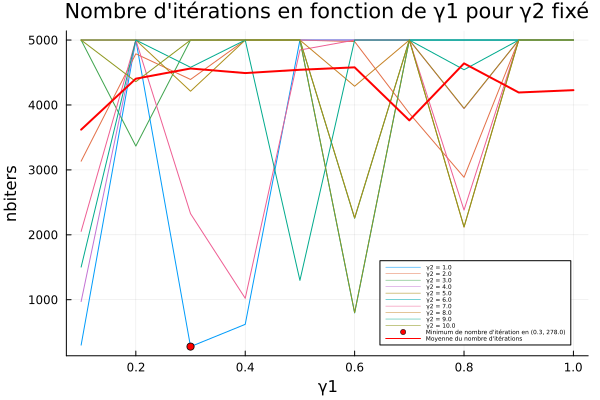

In [14]:
# Tracé du nombre d'itérations en fonction de γ1 et γ2
include("../src/regions_de_confiance.jl")
include("../test/fonctions_de_tests.jl")
using Plots

# Point initial 
x0 = x021

# Intervalle de γ1 et γ2
γ1Intervalle = range(0.1, 1, 10)
γ2Intervalle = range(1, 10, 10)

# Calcul des différentes valeurs de nb_iters pour les différentes valeurs de γ1 et de γ2
minNbIter = []
minNbIterIndice = []
moyNbIter = []

for j in γ2Intervalle
    # On calcule le nombre d'itération pour γ2 = j fixé et pour γ1 qui varie dans γ1Intervalle
    γ1nbIterationList = Float64[]
    for i in γ1Intervalle
        _, _, _, nb_iters, _ = regions_de_confiance(fct2, grad_fct2, hess_fct2, x0; γ1 = i, γ2 = j, algo_pas="cauchy")
        push!(γ1nbIterationList, nb_iters)
    end

    # On calcule le nombre d'itération moyen pour ce γ2 fixé
    moyenne = 0
    for k in γ1nbIterationList
        moyenne = moyenne + k
    end
    moyenne = moyenne ./ length(γ1nbIterationList)
    push!(moyNbIter, moyenne)

    # On ajoute le minimum pour cette itération du plus petit nombre d'itérations
    push!(minNbIter, minimum(γ1nbIterationList))
    push!(minNbIterIndice, argmin(γ1nbIterationList))

    # On affiche le résultat sur une figure
    if j == γ2Intervalle[1]
        # Tracé du nombre d'itération en fonction de γ1 pour des γ2 différents
        p = plot(γ1Intervalle, γ1nbIterationList, label = "γ2 = " * string(j))
    else 
        p = plot!(γ1Intervalle, γ1nbIterationList,  label = "γ2 = " * string(j))
    end
end

# On affiche le minimum de nombre d'itérations
minNbIterAll = minimum(minNbIter)
minNbIterAllIndice = γ1Intervalle[minNbIterIndice[argmin(minNbIter)]]

scatter!([minNbIterAllIndice], [minNbIterAll], color=:red, label="Minimum de nombre d'itération en (" * 
                                                                                    string(minNbIterAllIndice) * ", " * string(minNbIterAll) * ")" )

# On affiche le nombre d'itération moyen pour γ2 fixé dans γ2Intervalle
plot!(γ1Intervalle, moyNbIter, label = "Moyenne du nombre d'itérations", linewidth = 2, color="red")

# Réduction de la taille de la légende
plot!(legendfontsize=4, xlabel = "γ1", ylabel = "nbiters")

# Ajout d'un titre
title!("Nombre d'itérations en fonction de γ1 pour γ2 fixé")


>Dans le tracé ci-dessus, nous remarquons une grande variation de $nb\_iters$ en fonction des paramètres $\gamma_1$ et $\gamma_2$, on obtient un minimum de nombre d'itération pour $(\gamma_1, \gamma_2) = (0.3, 1.0)$. Mais cette optimisation de $\gamma_1$ et de $\gamma_2$ est liée à notre fonction et à notre point initial à savoir $f_2$ et $x_0 = (-1.2, 1)$, pour une autre fonction (ou même pour un autre point initial) il faudrait changer ces valeurs afin d'obtenir le nombre d'itération $nb\_iters$ minimal. 

Étudions également l'influence du paramètre $\Delta_0$ le rayon initial de la région de confiance

Nous choisissons pour exemple la fonction $f_2$ définie précédemment et le point initial $x_0 = (10, 0)$ 

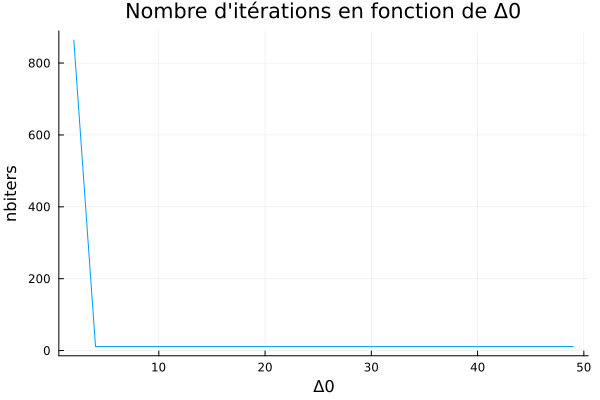

In [13]:
# Tracé du nombre d'itérations en fonction de Δ0
include("../src/regions_de_confiance.jl")
include("../test/fonctions_de_tests.jl")
using Plots

# Point initial 
x0 = x022

# Intervalle de Δ0
Δ0Intervalle = range(2, 49, 24)

# Intervalle du nombre d'itération obtenus
Δ0nbIterationList = []

for i in Δ0Intervalle
    _, _, _, nb_iters, _ = regions_de_confiance(fct2, grad_fct2, hess_fct2, x0; Δ0 = i, algo_pas="cauchy")
    push!(Δ0nbIterationList, nb_iters)
end

# Affichage du nombre d'itération en fonction de Δ0
plot(Δ0Intervalle, Δ0nbIterationList, xlabel = "Δ0", ylabel = "nbiters", legend = false)

# Ajout d'un titre
title!("Nombre d'itérations en fonction de Δ0")

>Nous allons faire varier $\Delta_0$ dans $[2; 49]$, et nous remarquons dans le tracé ci-dessus que le nombre d'itération passe de plus de 800 itérations pour $\Delta_0 = 2$ à moins de 100 itérations pour $\Delta_0 \geq 4$, l'augmentation de la taille de la région initial permet en effet de faire un plus grand pas à la première itération et donc d'effectuer moins d'itération ensuite, mais cette augmentation n'est pas à prendre à la légère. En effet, prendre une trop grande région de confiance initiale peut mener à un algorithme des régions de confiancen non robuste à tous points initiaux ce qui est contre-productif.

# Régions de confiance avec gradient conjugué tronqué

## Implémentation 

1. Implémenter l’algorithme du gradient conjugué tronqué (fichier `src/gct.jl`). Sa spécification est dans le fichier.
2. Vérifier que les tests ci-dessous passent.

In [3]:
include("../src/gct.jl")
include("../test/tester_gct.jl")

#
tester_gct(gct);

Test Summary:             | Pass  Total  Time
Gradient conjugué tronqué |    9      9  0.0s


3. Intégrer l’algorithme du gradient conjugué tronqué dans le code des régions de confiance.
4. Vérifier que les tests ci-dessous passent.

In [21]:
include("../src/regions_de_confiance.jl")
include("../test/tester_rc_gct.jl")

#
afficher = true # si true, alors affiche les résultats des algorithmes

#
tester_rc_gct(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : true



-------------------------------------------------------------------------
Résultats de : RC et gct appliqué à f1:
  * x0       = [1, 0, 0]
  * x_sol    = [1.0000000000000007, 1.0, 1.0]
  * f(x_sol) = 2.0214560696288428e-30
  * nb_iters = 1
  * flag     = 0
  * solution = [1, 1, 1]


-------------------------------------------------------------------------
Résultats de : RC et gct appliqué à f1:
  * x0       = [10.0, 3.0, -2.2]
  * x_sol    = [0.9999999999999996, 1.0000000000000002, 1.0000000000000004]
  * f(x_sol) = 4.930380657631324e-31
  * nb_iters = 3
  * flag     = 0
  * solution = [1, 1, 1]


-------------------------------------------------------------------------
Résultats de : RC et gct appliqué à f2:
  * x0       = [-1.2, 1.0]
  * x_sol    = [0.9999996743780089, 0.9999993478371609]
  * f(x_sol) = 1.0611413038132374e-13
  * nb_iters = 31
  * flag     = 0
  * solution = [1, 1]
-------------------------------------------------------------------------


Résultats de : RC et gct appliqué à f2:
  * x0       = [10, 0]
  * x_sol    = [1.0000035183009863, 1.0000066949336202]
  * f(x_sol) = 2.4053014026923312e-11
  * nb_iters = 44
  * flag     = 0
  * solution = [1, 1]
-------------------------------------------------------------------------
Résultats de : RC et gct appliqué à f2:
  * x0       = [0.0, 0.0050000000010000005]
  * x_sol    = [0.9999999999998994, 0.9999999999996207]
  * f(x_sol) = 3.1813581453548166e-24
  * nb_iters = 19
  * flag     = 0
  * solution = [1, 1]
Test Summary: | Pass  Total  Time
RC et gct     |   15     15  0.9s


## Interprétation  

Nous proposons de comparer l'utilisation du pas de Cauchy avec celle du gradient conjugué tronqué dans l'algorithme des régions de confiance.

**Remarques.**
* Nous vous demandons de réaliser des expérimentations numériques pour les comparaisons demandées ci-après.
* Vous devez utiliser l'argument optionnel `max_iter_gct` et la sortie `xs` de l'algorithme des régions de confiance.
* Vous pouvez comparer l'écart en norme entre les itérés de l'algorithme et la solution du problème.
* Vous trouverez des choses utiles dans le fichier `test/fonctions_de_tests.jl`.

1. Comparer dans le cas où l'on force le gradient conjugué tronqué à ne faire qu'une seule itération. Que remarquez vous ?
2. Comparer dans le cas général. Que remarquez vous ?
3. Quels sont les avantages et inconvénients des deux approches ?

## Justifications

1. Contrairement au pas de Cauchy, l'objectif du gradient conjugué tronqué est de déterminer le pas optimal en un nombre d'itération maximal $max\_ iter\_ gct$, mais   pour une unique itération de l'algorithme du gradient conjugué tronqué, le pas donné sera celui du pas de Cauchy. 

    Nous allons dans la suite comparer les résultats obtenus par l'algorithme des régions de confiance avec nos différents algorithmes (pas de Cauchy et gradient conjugué tronqué) mais en fixant $max\_ iter\_ gct = 1$. 

In [31]:
#Comparaison numérique de l'algorithme régions de confiance avec pas de Cauchy et gct (avec max_iter_gct = 1)
include("../src/regions_de_confiance.jl")
include("../test/fonctions_de_tests.jl")
using Plots

# Initialisation
x0 = x012
f = fct1
gradf = grad_fct1
hessf = hess_fct1

# On considère la fonction f1
# Déterminons le nombre d'itération et les différents itérés de l'algorithme des régions de confiance avec gct et le pas de cauchy
x_solC, f_solC, flagC, nb_itersC, xsC = regions_de_confiance(f, gradf, hessf, x0; algo_pas="cauchy")
x_solG, f_solG, flagG, nb_itersG, xsG = regions_de_confiance(f, gradf, hessf, x0; max_iter_gct = 1, algo_pas="gct")

afficher_resultats("RC et Pas de Cauchy", "f1", x0, x_solC, f_solC, flagC, nb_itersC, sol_exacte_fct1)
afficher_resultats("RC et GCT", "f1", x0, x_solG, f_solG, flagG, nb_itersG, sol_exacte_fct1)

# Initialisation
x0 = x022
f = fct2
gradf = grad_fct2
hessf = hess_fct2

# On considère la fonction f2
# Déterminons le nombre d'itération et les différents itérés de l'algorithme des régions de confiance avec gct et le pas de cauchy
x_solC, f_solC, flagC, nb_itersC, xsC = regions_de_confiance(f, gradf, hessf, x0; algo_pas="cauchy")
x_solG, f_solG, flagG, nb_itersG, xsG = regions_de_confiance(f, gradf, hessf, x0; max_iter_gct = 1, algo_pas="gct")

afficher_resultats("RC et Pas de Cauchy", "f2", x0, x_solC, f_solC, flagC, nb_itersC, sol_exacte_fct1)
afficher_resultats("RC et GCT", "f2", x0, x_solG, f_solG, flagG, nb_itersG, sol_exacte_fct1)

-------------------------------------------------------------------------
Résultats de : RC et Pas de Cauchy appliqué à f1:
  * x0       = [10.0, 3.0, -2.2]
  * x_sol    = [1.0000036431990917, 0.9999997146801121, 0.9999957861612836]
  * f(x_sol) = 3.2331854932222266e-11
  * nb_iters = 34
  * flag     = 2
  * solution = [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : RC et GCT appliqué à f1:
  * x0       = [10.0, 3.0, -2.2]
  * x_sol    = [1.0000036431990917, 0.9999997146801122, 0.999995786161284]
  * f(x_sol) = 3.233185492873304e-11
  * nb_iters = 34
  * flag     = 2
  * solution = [1, 1, 1]


-------------------------------------------------------------------------
Résultats de : RC et Pas de Cauchy appliqué à f2:
  * x0       = [10, 0]
  * x_sol    = [0.9961677295959247, 0.9923393628794702]
  * f(x_sol) = 1.4697922915267688e-5
  * nb_iters = 864
  * flag     = 0
  * solution = [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : RC et GCT appliqué à f2:
  * x0       = [10, 0]
  * x_sol    = [0.9961677295959247, 0.9923393628794702]
  * f(x_sol) = 1.4697922915267688e-5
  * nb_iters = 864
  * flag     = 0
  * solution = [1, 1, 1]


> Comme attendu, nous obtenons le même nombre d'itérations pour l'algorithme des régions de confiances avec le pas de Cauchy ou l'algorithme du gradient conjugué tronqué et $max\_ iter\_gct=1$. Mais aussi les mêmes solutions et itérations (à qlqs approximations numériques près), ce qui est naturel étant donné que le pas pris à chaque itération dans l'algorithme des régions de confiance est le même.

2. Dans le cas général, étant donné que l'algorithme du gradient conjugué tronqué donne un "meilleur" pas que celui du pas de Cauchy (vu qu'il cherche à l'optimiser contrairement à l'algorithme de Cauchy) , on s'attend à obtenir un nombre d'itération moindre pour l'algorithme des régions de confiance avec le gradient conjugué tronqué. Néanmoins, il ne faut pas oublier les itérations "cachés" de l'algorithme du gradient conjugué tronqué.

    Dans la suite, nous allons comparer numériquement les résultats obtenus à partir de l'algorithme des régions de confiance avec le pas de Cauchy et le gradient conjugué tronqué : 

In [82]:
# Comparaison numérique de l'algorithme des régions de confiance avec le pas de Cauchy et gct
include("../src/regions_de_confiance.jl")
include("../test/fonctions_de_tests.jl")
using Plots

# Initialisation
x0 = x012
f = fct1
gradf = grad_fct1
hessf = hess_fct1

# On considère la fonction f1
# Déterminons le nombre d'itération et les différents itérés de l'algorithme des régions de confiance avec gct et le pas de cauchy
x_solC, f_solC, flagC, nb_itersC, xsC = regions_de_confiance(f, gradf, hessf, x0; algo_pas="cauchy")
x_solG, f_solG, flagG, nb_itersG, xsG = regions_de_confiance(f, gradf, hessf, x0; algo_pas="gct")

afficher_resultats("RC et Pas de Cauchy", "f1", x0, x_solC, f_solC, flagC, nb_itersC, sol_exacte_fct1)
afficher_resultats("RC et GCT", "f1", x0, x_solG, f_solG, flagG, nb_itersG, sol_exacte_fct1)

# Initialisation
x0 = x022
f = fct2
gradf = grad_fct2
hessf = hess_fct2

# On considère la fonction f2
# Déterminons le nombre d'itération et les différents itérés de l'algorithme des régions de confiance avec gct et le pas de cauchy
x_solC, f_solC, flagC, nb_itersC, xsC = regions_de_confiance(f, gradf, hessf, x0; algo_pas="cauchy")
x_solG, f_solG, flagG, nb_itersG, xsG = regions_de_confiance(f, gradf, hessf, x0; algo_pas="gct")

afficher_resultats("RC et Pas de Cauchy", "f2", x0, x_solC, f_solC, flagC, nb_itersC, sol_exacte_fct2)
afficher_resultats("RC et GCT", "f2", x0, x_solG, f_solG, flagG, nb_itersG, sol_exacte_fct2)

-------------------------------------------------------------------------
Résultats de : RC et Pas de Cauchy appliqué à f1:
  * x0       = [10.0, 3.0, -2.2]
  * x_sol    = [1.0000036431990917, 0.9999997146801121, 0.9999957861612836]
  * f(x_sol) = 3.2331854932222266e-11
  * nb_iters = 34
  * flag     = 2
  * solution = [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : RC et GCT appliqué à f1:
  * x0       = [10.0, 3.0, -2.2]
  * x_sol    = [0.9999999999999996, 1.0000000000000002, 1.0000000000000004]
  * f(x_sol) = 4.930380657631324e-31
  * nb_iters = 3
  * flag     = 0
  * solution = [1, 1, 1]


-------------------------------------------------------------------------
Résultats de : RC et Pas de Cauchy appliqué à f2:
  * x0       = [10, 0]
  * x_sol    = [0.9961677295959247, 0.9923393628794702]
  * f(x_sol) = 1.4697922915267688e-5
  * nb_iters = 864
  * flag     = 0
  * solution = [1, 1]
-------------------------------------------------------------------------
Résultats de : RC et GCT appliqué à f2:
  * x0       = [10, 0]
  * x_sol    = [1.0000035183009863, 1.0000066949336202]
  * f(x_sol) = 2.4053014026923312e-11
  * nb_iters = 44
  * flag     = 0
  * solution = [1, 1]


> Comme attendu, nous obtenons un nombre d'itération moindre avec l'algorithme du gradient conjugué tronqué.

Observons les différents itérés pour la fonction $f_{2}(x_1,x_2) = 100(x_2-x_1^2)^2 + (1-x_1)^2$ et le point initial $x_0 = (10, 0)$ obtenus à partir de l'algorithme des régions de confiance pour les deux différentes méthodes d'obtention de pas :

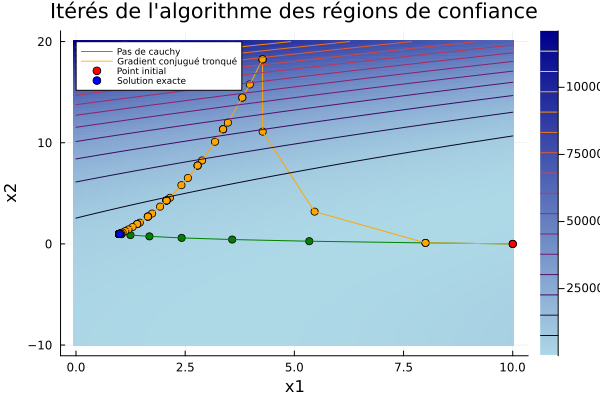

-------------------------------------------------------------------------
Résultats de : RC et Pas de Cauchy appliqué à f2:
  * x0       = [10, 0]
  * x_sol    = [0.9961677295959247, 0.9923393628794702]
  * f(x_sol) = 1.4697922915267688e-5
  * nb_iters = 864
  * flag     = 0
  * solution = [1, 1]
-------------------------------------------------------------------------
Résultats de : RC et GCT appliqué à f2:
  * x0       = [10, 0]
  * x_sol    = [1.000003518300986, 1.00000669493362]
  * f(x_sol) = 2.40530140101872e-11
  * nb_iters = 44
  * flag     = 0
  * solution = [1, 1]


In [2]:
# Affichage du tracé des itérés pour la fonction f2 et le point initial x0 = [10,0] pour les deux méthodes de calcul de pas
include("../src/regions_de_confiance.jl")
include("../test/fonctions_de_tests.jl")
using Plots

# Initialisation
x0 = x022
f = fct2
gradf = grad_fct2
hessf = hess_fct2

# Intervalle
nbPoint = 100
x1Intervalle = range(0, 10, 100)
x2Intervalle = range(-10, 20, 100)
valeurF = [f([i,j]) for i in x1Intervalle, j in x2Intervalle]

h = heatmap(x1Intervalle, x2Intervalle, valeurF, color=:blues, xlabel = "x1", ylabel = "x2", title = "Itérés de l'algorithme des régions de confiance", legendfontsize=6)

# On considère la fonction f2
# Déterminons le nombre d'itération et les différents itérés de l'algorithme des régions de confiance avec cauchy
x_solC, f_solC, flagC, nb_itersC, xsC = regions_de_confiance(f, gradf, hessf, x0; algo_pas="cauchy")

pt1 = xsC[1]
pt2 = xsC[2]
scatter!(h, [pt1[1]], [pt1[2]], label = false, color = :green)
scatter!(h, [pt2[1]], [pt2[2]], label = false, color = :green)
plot!(h, [pt1[1], pt2[1]], [pt1[2], pt2[2]], label = "Pas de cauchy", color = :green)
for i in 2:length(xsC)-1
    pt1 = xsC[i]
    pt2 = xsC[i+1]
    scatter!(h, [pt2[1]], [pt2[2]], label = false, color = :green)
    plot!(h, [pt1[1], pt2[1]], [pt1[2], pt2[2]],label = false, color = :green)
end 

# On considère la fonction f2
# Déterminons le nombre d'itération et les différents itérés de l'algorithme des régions de confiance avec gct
x_solG, f_solG, flagG, nb_itersG, xsG = regions_de_confiance(f, gradf, hessf, x0; algo_pas="gct")

pt1 = xsG[1]
pt2 = xsG[2]
scatter!(h, [pt1[1]], [pt1[2]], label = false, color = :orange)
scatter!(h, [pt2[1]], [pt2[2]], label = false, color = :orange)
plot!(h, [pt1[1], pt2[1]], [pt1[2], pt2[2]], label = "Gradient conjugué tronqué", color = :orange)
for i in 2:length(xsG)-1
    pt1 = xsG[i]
    pt2 = xsG[i+1]
    scatter!(h, [pt2[1]], [pt2[2]], label = false, color = :orange)
    plot!(h, [pt1[1], pt2[1]], [pt1[2], pt2[2]],label = false, color = :orange)
end 

# Affichage de la position initiale
scatter!([x022[1]], [x022[2]], label = "Point initial", color = :red)
scatter!([sol_exacte_fct2[1]], [sol_exacte_fct2[2]], label = "Solution exacte", color = :blue)


# Affichage des courbes de niveau 
contour!(x1Intervalle, x2Intervalle, reshape(valeurF, length(x1Intervalle), length(x2Intervalle)))
display(h)

afficher_resultats("RC et Pas de Cauchy", "f2", x0, x_solC, f_solC, flagC, nb_itersC, sol_exacte_fct2)
afficher_resultats("RC et GCT", "f2", x0, x_solG, f_solG, flagG, nb_itersG, sol_exacte_fct2)

> Comme attendu, l'algorithme du pas de Cauchy donne des itérés suivant une unique direction (l'opposé du gradient de la fonction), quant aux itérés de l'algorithme du gradient conjugué tronqué, elle permet en faisant un détour (et donc de changer de direction) de converger vers la solution plus rapidement. Malgré le fait que le tracé donne l'impression que l'algorithme du pas de Cauchy converge plus rapidement, il fait en fait 864 itérations comparé à 44 pour la méthode du gradient conjugué tronqué, c'est-à-dire qu'avec le pas de Cauchy, l'algorithme des régions de confiance stagne beaucoup.

3. Discutons des avantages et des inconvenients pour chaque méthode de calcul de pas : 

    * Pas de Cauchy : L'algorithme du pas de Cauchy est simple à implémenter et aussi très peu couteux (un produit matrice-vecteur, 2 produits vecteur-vecteur). Mais il est très sensible aux conditions du problème, si le problème est mal conditionné alors l'algorithme devient inefficace et prend beaucoup de temps avant de converger vers la solution.

    * Gradient conjugué tronqué : L'algorithme du gradient conjugué tronqué permet généralement d'obtenir un nombre d'itérations moindre que la méthode précédente, mais il n'est pas aussi simple à implémenter que cela. Comme pour le pas de Cauchy, le gradient conjugué tronqué est aussi sensible aux conditions du problème.

    Finalement, pour savoir quelle méthode choisir, il faut faire des tests numériques. Mais pour un problème simple, il vaut mieux utiliser l'algorithme du pas de Cauchy car beaucoup plus simple à implémenter.
